# Practice Question
1. Implement Perceptron Model on Iris dataset (first 2 features)
2. Divide the dataset into Train, Validation and Test data. Tune the cost parameter for SVM on Iris data.
Try Values {0.0001, 0.001,0.01,0.1,1,10,100}
3. Select the best and the worst value and compare the results on the test data.

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [28]:
# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Perceptron

In [29]:
# Model
clf = Perceptron(penalty='l2', alpha=0.001)
# fit
clf.fit(X_train, y_train)
# predict
pred = clf.predict(X_test)
#evaluate
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.6


# SVM

In [30]:
# Split training data into testing and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [31]:
for cost in [0.0001, 0.001,0.01,0.1,1,10,100]:
    clf = SVC(kernel='linear', C=cost)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_valid)
    print ('Valid accuracy for C= '+ str(cost) + ' : ' + str(accuracy_score(y_valid, pred)))

Valid accuracy for C= 0.0001 : 0.291666666667
Valid accuracy for C= 0.001 : 0.291666666667
Valid accuracy for C= 0.01 : 0.458333333333
Valid accuracy for C= 0.1 : 0.791666666667
Valid accuracy for C= 1 : 0.791666666667
Valid accuracy for C= 10 : 0.791666666667
Valid accuracy for C= 100 : 0.791666666667


In [32]:
# C=0.1 selected as best
X_train = np.concatenate((X_train, X_valid))
y_train = np.concatenate((y_train, y_valid))

clf = SVC(kernel='linear', C=0.1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ('Test accuracy for C= '+ str(0.1) + ' : ' + str(accuracy_score(y_test, pred)))

Test accuracy for C= 0.1 : 0.766666666667


In [33]:
# C=0.1 selected as worst
X_train = np.concatenate((X_train, X_valid))
y_train = np.concatenate((y_train, y_valid))

clf = SVC(kernel='linear', C=0.0001)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ('Test accuracy for C= '+ str(0.1) + ' : ' + str(accuracy_score(y_test, pred)))

Test accuracy for C= 0.1 : 0.366666666667


In [34]:
from matplotlib.colors import ListedColormap

def plt_boundary(C):

    h = .008  # step size in the mesh


    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train, pred)

    s_vectors = clf.support_vectors_
    
    idx = clf.support_
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
    y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_bold)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c=y_train[idx], s=100,
                facecolors='none', zorder=10, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('F1', fontsize=20)
    plt.ylabel('F2', fontsize=20)
    plt.title("SVM for C = %s (Train Acc= %.3f)"
                  % (str(C), accuracy), fontsize=20)

    plt.savefig('svm')
    plt.show()

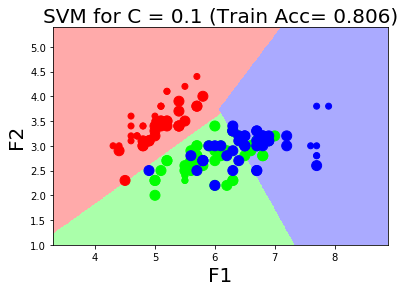

In [35]:
plt_boundary(0.1)

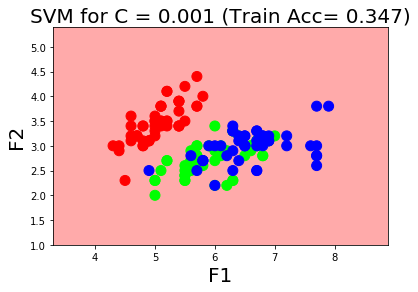

In [36]:
plt_boundary(0.001)